# Исследование опроса клиентов телеком-компании


[Постановка задачи](#Постановка-задачи) <br>
[Codebook](#Codebook)<br>
[Задача исследования](#Задача-исследования)<br>
[1. Недовольных качеством связи клиентов большинство](#1.-Недовольных-качеством-связи-клиентов-большинство)<br>
[1.1 Анализ данных](#1.1-Анализ-данных)<br>
[1.2 Статистический тест](#1.2-Статистический-тест)<br>
[1.3 Выводы](#1.3-Выводы)<br>
[2. Между показателями, характеризующими скорость мобильного интернета, есть корреляция](#2.-Между-показателями,-характеризующими-скорость-мобильного-интернета,-есть-корреляция)<br>
[2.1 Анализ данных](#2.1-Анализ-данных)<br>
[2.2 Статистический тест](#2.2-Статистический-тест)<br>
[2.3 Выводы](#2.3-Выводы)<br>
[3. Между скоростью интернета и ответом клиентов есть корреляция](#3.-Между-скоростью-интернета-и-ответом-клиентов-есть-корреляция)<br>
[3.1 Анализ данных](#3.1-Анализ-данных)<br>
[3.2 Статистический тест](#3.2-Статистический-тест)<br>
[3.3 Выводы](#3.3-Выводы)<br>
[4. Между скоростью мобильного интернета и переотправкой пакетов есть корреляция](#4.-Между-скоростью-мобильного-интернета-и-переотправкой-пакетов-есть-корреляция)<br>
[4.1 Анализ данных](#4.1-Анализ-данных)<br>
[4.2 Статистический тест](#4.2-Статистический-тест)<br>
[4.3 Выводы](#4.3-Выводы)<br>
[Заключение](#Заключение)<br>


## Постановка задачи

Извенстная телеком-компания (из большой тройки) провела опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. <br>
Необходимо провести исследование и проанализировать, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. <br><br><br>

**Более подробно о проведённом опросе:**

В ходе опроса компания предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже представлена блок-схема опроса.<br>

![](doc/survey_block_schem.jpg)

## Codebook

`data.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro

## Задача исследования

Основная цель исследования состоит в том, чтобы определить зависят ли оценки клиентов в опросе от собранных технических показателей.
В исходных данных собрана информация, о показателях, связанных с передачей данных через интернет. Поэтому сформулируем главную гипотезу исследования так:
**жалобы клиентов на мобильный интернет подтверждаются собранными техническими показателями.**

Данная гипотеза является достаточно общей, поэтому разобьем исследование на части, в которых проверим локальные гипотезы, которые помогут подтвердить или опровергнуть главную гипотезу:

* Недовольных качеством связи клиентов большинство.
* Между показателями, характеризующими скорость мобильного интернета, есть корреляция.
* Между скоростью интернета и ответом клиентов есть корреляция.
* Между скоростью мобильного интернета и переотправкой пакетов есть корреляция.

## 1. Недовольных качеством связи клиентов большинство

Цель данного раздела определить количество довольных и недовольных клиентов. Результаты этого исследования должны показать существование проблемы в целом, как таковой, что поможет в принятии решений о необходимости и оперативности ее (проблемы) решения.<br>
Также проверим являются ли оценки недовольных клиентов нормально распределенными. Если оценки недовольных клиентов нормально распределены, то для дальнейших исследований можно будет использовать только часть выборки, которая является наиболее репрезентативной, что поможет упростить и сократить процесс.

Уточним, проверяемую нами гипотезу: **недовольных качеством связи клиентов (поставили оценку ниже 9) больше, чем довольных (поставили оценку 9), при этом оценки недовольных клиентов нормально распределены.**


### 1.1 Анализ данных

Загрузим данные

In [18]:
df = pd.read_csv('data/data.csv')

df

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


Посмотрим общую информацию о датафрейме

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

Посмотрим есть ли ответы на первый вопрос с пустыми значениями

In [20]:
df[df.Q1.isnull()]

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
371,372,NaN,NaN,286.62191,2320.25,75.60,3.84,4499.92,1790,1035.64,200
3026,3027,NaN,NaN,875.62280,7258.66,226.08,0.60,8336.42,1087,3112.83,54


Всего 2 строки с пустыми значениями, уберем их из рассмотрения

In [21]:
df = df[df.Q1.notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3110 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3110 non-null   float64
 4   Downlink Throughput(Kbps)                  3110 non-null   float64
 5   Uplink Throughput(Kbps)                    3110 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3110 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3110 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3110 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3110 non-null   float64
 10  Web Average TCP RTT(ms) 

Приведем ответы на первый вопрос к int для удобства анализа

In [22]:
def valtoint (p_val):
    '''
    Приведение входного значения к int
    
    return:
    если удалось преобразовать тип, то int(p_val),
    иначе -1
    '''
    
    try:
        return int(p_val)
    except ValueError:
        return -1
    
#valtoint

df['Q1_int'] = df['Q1'].apply(lambda x: valtoint(x))

df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_int
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,5
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,5
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,1
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,8
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304,3
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251,3
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109,10
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202,6


Посмотрим какие ответы не удалось преобразовать

In [23]:
df[df.Q1_int == -1]

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),Q1_int
80,81,"2, 9",NaN,567.03467,1049.72,149.62,1.29,1925.91,1263,761.13,475,-1
238,239,"1, 3",NaN,347.03333,2177.92,152.08,2.23,5305.51,1039,2978.12,75,-1
459,460,"1, 6",NaN,190.05419,13188.11,117.64,0.83,11146.57,746,1636.00,88,-1
491,492,***** ** ***,NaN,479.50838,8675.19,230.06,0.33,6818.51,1562,2797.14,52,-1
677,678,"3 - дер.Ширяево Волоколамского района, 9 - в М...",NaN,494.05844,638.49,149.04,3.06,763.87,4300,478.37,237,-1
685,686,"10, 9",NaN,309.17551,1554.28,734.21,1.48,5547.02,1364,2237.10,124,-1
834,835,"Чем даль ше,тем лучше.Спасибо за ваш труд.Оцен...",NaN,886.05369,1115.41,937.26,1.20,4439.31,1930,753.67,109,-1
897,898,ОЦЕНКА-3/НЕВАЖНО/,NaN,257.97201,620.42,43.65,2.10,1771.26,1791,2086.17,201,-1
980,981,Отвратительно,NaN,861.34490,728.55,119.85,1.15,1489.39,3102,445.06,675,-1
1164,1165,"1, 3",NaN,376.56648,387.07,104.47,17.25,2640.24,2881,314.14,262,-1


Посчитаем количество таких ответов

In [24]:
df.Q1_int[df.Q1_int == -1].count()

39

"Мусорных" ответов не так много, поэтому также избавимся от строк с такими ответами

In [25]:
df = df[df.Q1_int > -1]

df.Q1 = df.Q1_int

df = df.drop('Q1_int', axis = 1)

total = df.Q1.count()

df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...,...
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


Выберем ответы, где клиенты поставили **9 и 10**

In [26]:
df_satisfied = df [df.Q1 >= 9]

satisfied = df_satisfied.Q1.count()

satisfied

1087

Выберем ответы, где клиенты поставили оценку меньше **9**

In [27]:
df_unsatisfied = df [df.Q1 < 9]

unsatisfied = df_unsatisfied.Q1.count()

unsatisfied

1984

Мы видим, что клиентов, которые поставили оценку ниже 9 почти в 2 раза больше, чем тех, которые поставили оценку 9 или больше!

In [28]:
def bar_plot_type_1 (p_values_a, p_values_b, p_title, p_xlabels, p_ylabel, p_val_a_label, p_val_b_label, 
                     p_xticks_rotation= 0, p_width = 10, p_height = 5):
    '''
    Построение столбчетой диаграммы сравнивающей 2 варианта A и В
    p_values_a - список значений варианта А (ось Y)
    p_values_b - список значений варианта В (ось Y)
    p_title - заголовок графика
    p_xlabels - список подписей оси X,
    p_ylabel - подпись оси Y
    p_val_a_label - подпись для легенды варианта А
    p_val_b_label - подпись для легенды варианта В
    p_xticks_rotation  - угол поворота подписей по оси Х
    p_width - ширина графика
    p_height - высота графика
    '''
    
    labels = p_xlabels

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    fig.set_size_inches(p_width, p_height)

    rects1 = ax.bar(x - width/2, p_values_a, width, label= p_val_a_label, color= 'blue')
    rects2 = ax.bar(x + width/2, p_values_b, width, label= p_val_b_label, color= 'red')

    # подписи графика
    ax.set_ylabel(p_ylabel)
    ax.set_title(p_title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    #Разворачиваем подписи
    plt.xticks(rotation= p_xticks_rotation)

    def autolabel(rects):
        """Подписи значений"""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    #autolabel

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()
    
    
#bar_plot_type_1

Отобразим на графике количество клиентов с высокой и низкой оценкой

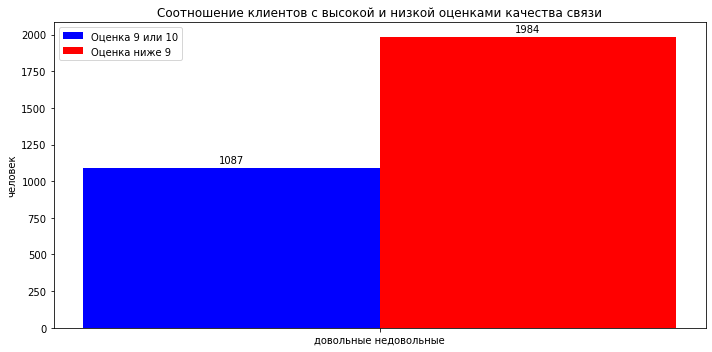

In [29]:
bar_plot_type_1 ([satisfied],
                 [unsatisfied],
                 'Соотношение клиентов с высокой и низкой оценками качества связи',
                 ['довольные недовольные'],
                 'человек',
                 'Оценка 9 или 10',
                 'Оценка ниже 9'
                )

Посчитаем соотношение в процентах

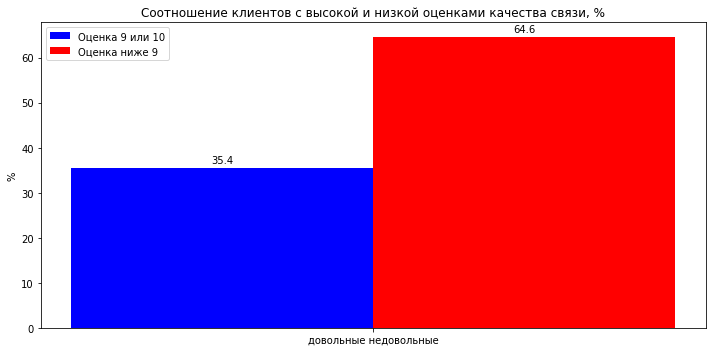

In [30]:
satisfied_perc = round(100 * satisfied / total, 1)
unsatisfied_perc = round(100 * unsatisfied / total, 1)

bar_plot_type_1 ([satisfied_perc],
                 [unsatisfied_perc],
                 'Соотношение клиентов с высокой и низкой оценками качества связи, %',
                 ['довольные недовольные'],
                 '%',
                 'Оценка 9 или 10',
                 'Оценка ниже 9'
                )

### 1.2 Статистический тест

Проверим являются ли оценки недовольных клиентов нормально распределенными. Для этого проверим гипотезы:

$H_0$: Оценки недовольных клиентов распределены нормально

$H_1$: Оценки недовольных клиентов не распределены нормально

Для проверки гипотез используем **критерий Шапиро-Уилка**. Данный критерий может быть использован, если мы допускаем, что наблюдения в нашей выборке независимые

In [31]:
stat, p = shapiro(df_unsatisfied.Q1)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Значения в выборке рапредлены нормально')
else:
    print('Значения в выборке не рапредлены нормально')

stat=0.878, p=0.000
Значения в выборке не рапредлены нормально


Посмотрим распределение ответов пользоватлей, которые поставили оценку меньше 9 на гистограмме

Text(0.5, 0, 'Оценка')

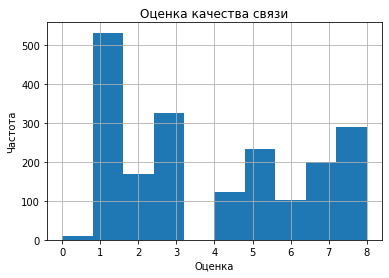

In [32]:
ax = df_unsatisfied.Q1.hist()

ax.set_title('Оценка качества связи')
ax.set_ylabel('Частота')
ax.set_xlabel('Оценка')

### 1.3 Выводы

По результатам анализа удалось подтвердить гипотезу о том, что клиентов недовольных качеством связи, которые поставили оценку ниже 9 балов, почти **в 2 раза больше, чем тех, которые поставили высокие оценки — 1 984 против 1 087, т.е. 65% от общего числа клиентов**, прошедших опрос, что говорит о том, что проблема действительно существует и необходимо проводить анализ данных для установления ее причин.

Также проведя статистический тест мы увидели, что оценки недовольных клиентов не распределены нормально, поэтому на данном этапе нельзя однозначно выделить группу клиентов для дальнейшего анализа по оценкам, поставленным в ответе на первый вопрос, и отказаться от рассмотрения других результатов.

## 2. Между показателями, характеризующими скорость мобильного интернета, есть корреляция

Для того чтобы не тратить время на исследование каждого показателя важно определить есть ли между ними связь. Также нам важно понять группы проблем, на которые клиенты жаловались больше всего. <br>
В данных есть 8 показателей, характеризующих интернет соединение, попробуем определить есть ли между ними связь, т. е. проверим гипотезу о том, что **между показателями, характеризующими скорость мобильного интернета, есть корреляция.**

### 2.1 Анализ данных

Для начала разобьем ответы по группам удовлетворенности, чтобы посмотреть можно ли выделить зависимости между удовлетворенностью и типом жалобы.<br> 

Посмотрим есть ли пустые ответы на второй вопрос

In [33]:
df_unsatisfied[df_unsatisfied.Q2.isnull()]

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
5,6,3,NaN,416.67461,1346.89,175.53,1.08,4553.01,2136,1587.58,551
11,12,1,NaN,730.53759,4020.94,569.49,1.57,8747.53,1556,1347.73,77
12,13,1,NaN,828.47641,2171.11,46.16,8.49,2483.79,2504,1923.60,112
16,17,3,NaN,401.82326,151.41,34.70,2.55,675.88,6550,341.83,827
...,...,...,...,...,...,...,...,...,...,...,...
3084,3085,1,NaN,563.54476,1154.29,52.04,0.59,6691.67,1479,1551.31,112
3086,3087,2,NaN,199.24502,757.94,173.63,1.83,11859.47,1922,1285.43,86
3088,3089,1,NaN,406.17290,421.96,98.46,1.99,4724.27,1232,4685.48,102
3106,3107,1,NaN,490.50187,1992.68,85.73,0.87,3477.94,2004,2369.41,245


Пустых ответов на второй вопрос, примерно, треть от общего количества ответов. Это много, поэтому мы не можем их отбросить. Поставим им код **"-1"**, чтобы можно было дальше их использовать для анализа

In [34]:
def nantostrm (p_val):
    '''
    Проверка входного значения на NaN:
    Если NaN, то выдаем -1, иначе возвращаем исходное значение
    '''
    res = p_val
    
    try:
        if np.isnan(float(res)):
            res = '-1'
        
    except ValueError:
        pass
    
    return res
    
#nantostrm

df_unsatisfied['Q2'] = df_unsatisfied['Q2'].apply (lambda x: nantostrm(x) )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Посчитаем количество каждого типа ответа Q2 для каждого варианта ответа Q1

In [35]:
answer_stat = {}
for i in range (9):
    answer_stat[i] = {}
    for row in df_unsatisfied[df_unsatisfied['Q1'] == i].iterrows():
        
        l = row[1][2].split(', ')
        for item in l:
            if item not in answer_stat[i].keys():
                answer_stat[i][item] = 1
            else:
                answer_stat[i][item] += 1
            
    #for
#for
    
df_answer_stat = pd.DataFrame.from_dict(answer_stat, 'index')

df_answer_stat

,-1,4,1,3,7,5,2,6,0,34,10,05,27
0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,199,164.0,179.0,186.0,40.0,67.0,56.0,2.0,3.0,1.0,1.0,NaN,NaN
2,55,60.0,61.0,63.0,7.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,106,121.0,127.0,123.0,11.0,41.0,35.0,1.0,NaN,NaN,NaN,NaN,NaN
4,33,45.0,45.0,48.0,5.0,11.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN
5,76,78.0,79.0,88.0,11.0,25.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
6,28,29.0,33.0,40.0,1.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
7,61,67.0,53.0,66.0,5.0,25.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN
8,101,61.0,70.0,91.0,6.0,25.0,14.0,7.0,1.0,NaN,NaN,1.0,1.0


Уберем колонки и строки с некорректными значениями, т.к. их количество мало и не повлияет на результат

In [36]:
df_answer_stat = df_answer_stat.drop(columns = ['0', '34', '10', '05', '27'])
df_answer_stat = df_answer_stat.drop(0)

#отсортируем колонки
df_answer_stat = df_answer_stat.reindex(sorted(df_answer_stat.columns), axis=1)
#Заменим NaN на 0
df_answer_stat = df_answer_stat.fillna(0)

df_answer_stat

,-1,1,2,3,4,5,6,7
1,199,179.0,56.0,186.0,164.0,67.0,2.0,40.0
2,55,61.0,13.0,63.0,60.0,18.0,0.0,7.0
3,106,127.0,35.0,123.0,121.0,41.0,1.0,11.0
4,33,45.0,11.0,48.0,45.0,11.0,1.0,5.0
5,76,79.0,28.0,88.0,78.0,25.0,0.0,11.0
6,28,33.0,9.0,40.0,29.0,9.0,0.0,1.0
7,61,53.0,18.0,66.0,67.0,25.0,2.0,5.0
8,101,70.0,14.0,91.0,61.0,25.0,7.0,6.0


In [37]:
answers_q2 = ['-1 Не определено',
              '1 Недозвоны, обрывы при звонках',
              '2 Время ожидания гудков', 
              '3 Плохое качество связи в зданиях', 
              '4 Медленный мобильный интернет', 
              '5 Медленная загрузка видео', 
              '6 Затрудняюсь ответить', 
              '7 Свой вариант']

Построим графики распределения ответов Q1(Q2)

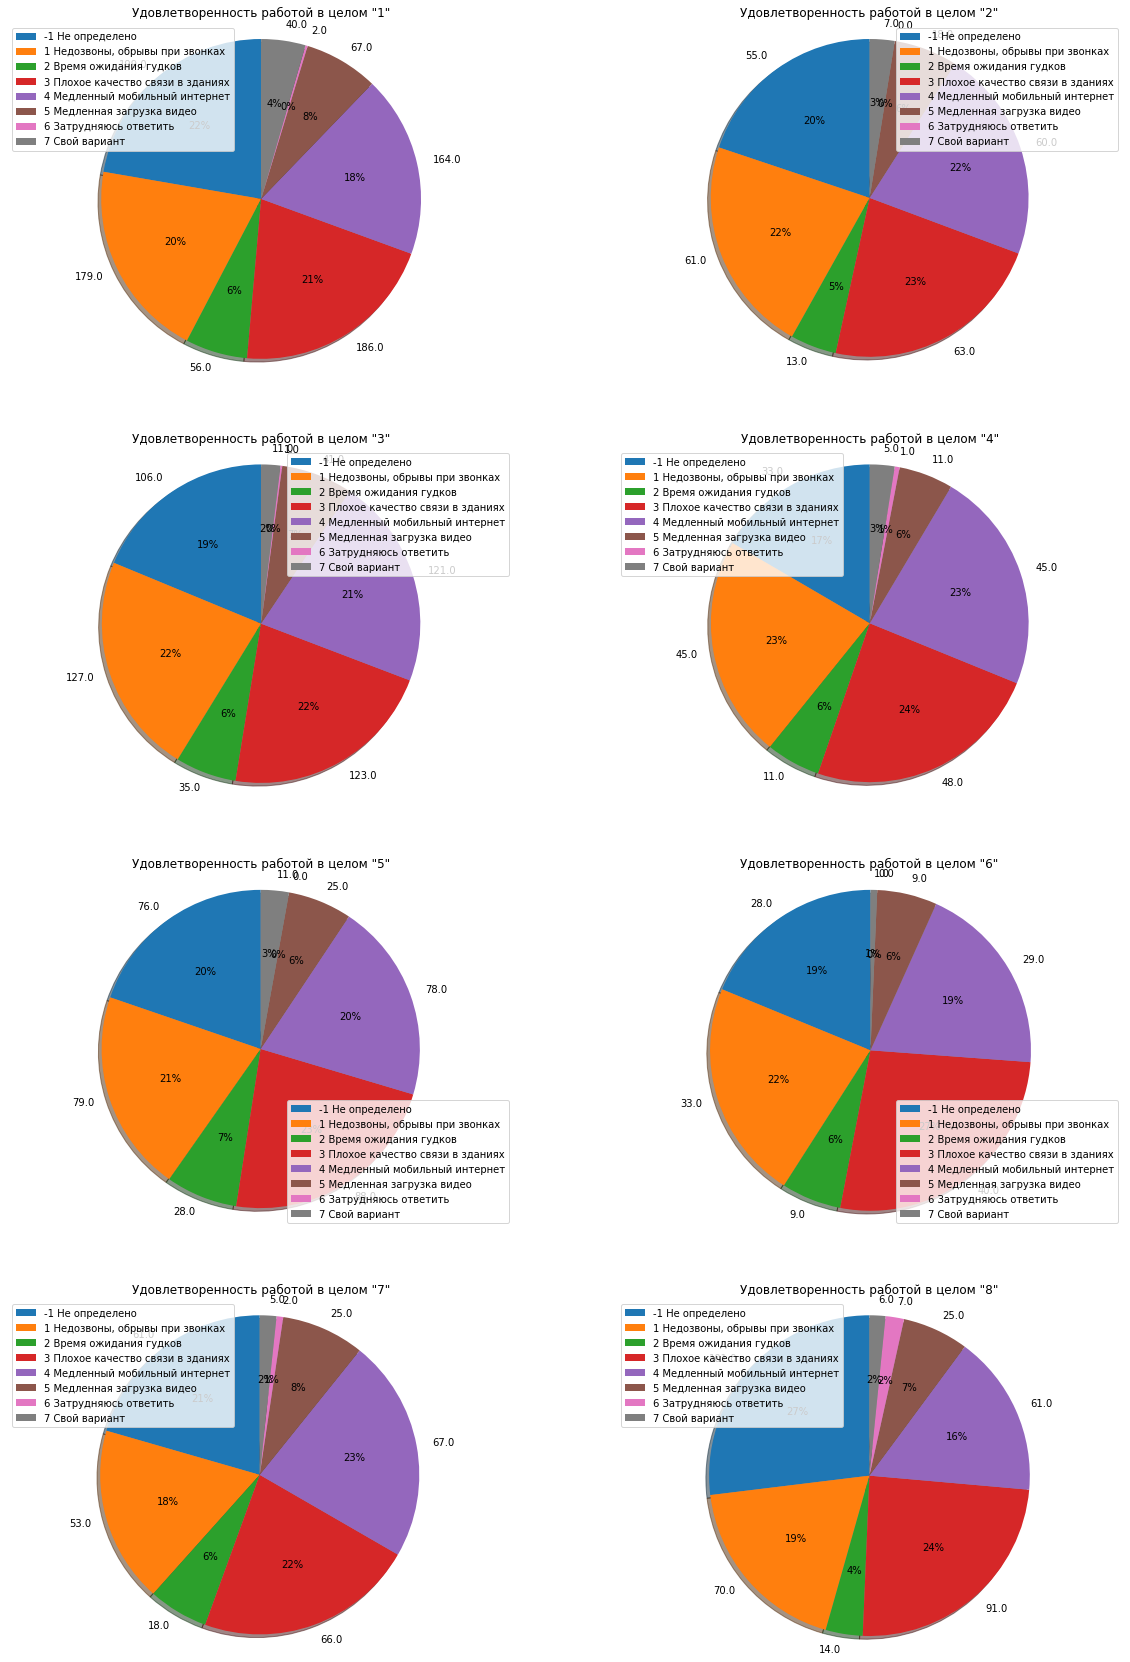

In [38]:
fig = plt.figure()
fig.set_size_inches(20, 30)

#определяем размерность сетки
col_cnt = 2
row_cnt = 4
gs = fig.add_gridspec(row_cnt, col_cnt)

i = 0
j = 0
for row in df_answer_stat.iterrows():    
    
    ax = fig.add_subplot(gs[i,j])
    ax.pie(row[1], labels= row[1] , autopct='%1.0f%%', shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    ax.set_title('Удовлетворенность работой в целом "{}"'.format(row[0]))
    ax.legend(labels = answers_q2)
    
   
    j = j + 1
    if j == col_cnt:
        i = i + 1
        j = 0
    #if
    
#for

plt.show()

Посчитаем количестов ответов по каждому типу ответа на первый вопрос


In [39]:
df_answer_stat['sum'] = df_answer_stat.sum(axis = 1)

df_answer_stat

,-1,1,2,3,4,5,6,7,sum
1,199,179.0,56.0,186.0,164.0,67.0,2.0,40.0,893.0
2,55,61.0,13.0,63.0,60.0,18.0,0.0,7.0,277.0
3,106,127.0,35.0,123.0,121.0,41.0,1.0,11.0,565.0
4,33,45.0,11.0,48.0,45.0,11.0,1.0,5.0,199.0
5,76,79.0,28.0,88.0,78.0,25.0,0.0,11.0,385.0
6,28,33.0,9.0,40.0,29.0,9.0,0.0,1.0,149.0
7,61,53.0,18.0,66.0,67.0,25.0,2.0,5.0,297.0
8,101,70.0,14.0,91.0,61.0,25.0,7.0,6.0,375.0


Самое большое количество вариантов ответа при общих уровнях удовлетворенности:
* 1 — 893
* 3 — 565
* 5 — 385
* 8 — 375

Также удалось установить, что больше всего клиенты недовольны:
* (1) Недозвоны, обрывы при звонках
* (3) Плохое качество связи в зданиях
* (4) Медленный мобильный интернет
* (-1) Не определено

Каждая, из вышеперечисленных групп, составляет примерно по 20% от общего количества типов проблем, на которые жалуются клиенты. Поэтому дальше стоит исследовать проблемы, связанные с данными группами ответов.

### 2.2 Статистический тест

В пункте 2.1 нам удалось определить группы проблем, на которые клиенты жаловались больше всего. Исследовать глубже проблемы, связанные с плохим качеством связи при звонках, а также качества связи в зданиях, мы не сможем, т. к. в данных у нас параметры, которые характеризуют качество передачи данных через интернет. Поэтому дальнейшие исследования надо направить на обследование клиентов, которые жаловались на интернет.

Проверим гипотезы:<br>

$H_0$: нет связи между параметрами "средняя скорость к абоненту", "скорость загрузки потокового видео", "задержка старта воспроизведения видео" и "скорость загрузки web-страниц через браузер"<br>
$H_1$: есть прямая связь между параметрами средняя скорость к абоненту", "скорость загрузки потокового видео", "задержка старта воспроизведения видео" и "скорость загрузки web-страниц через браузер"<br>

Для установления связи между параметрами используем **коэффициент корреляции Пирсона**. Для использования данного статистического метода мы допускаем, что наблюдения выборках независимы и одинаково распределены, а также значения должны иметь одинаковый разброс.

In [40]:
#выделим метрики в отдельный список для удобства дальнкйшей работы
METRICS = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)', 'Uplink Throughput(Kbps)', 
           'Downlink TCP Retransmission Rate(%)', 'Video Streaming Download Throughput(Kbps)',
           'Video Streaming xKB Start Delay(ms)', 'Web Page Download Throughput(Kbps)', 
           'Web Average TCP RTT(ms)']

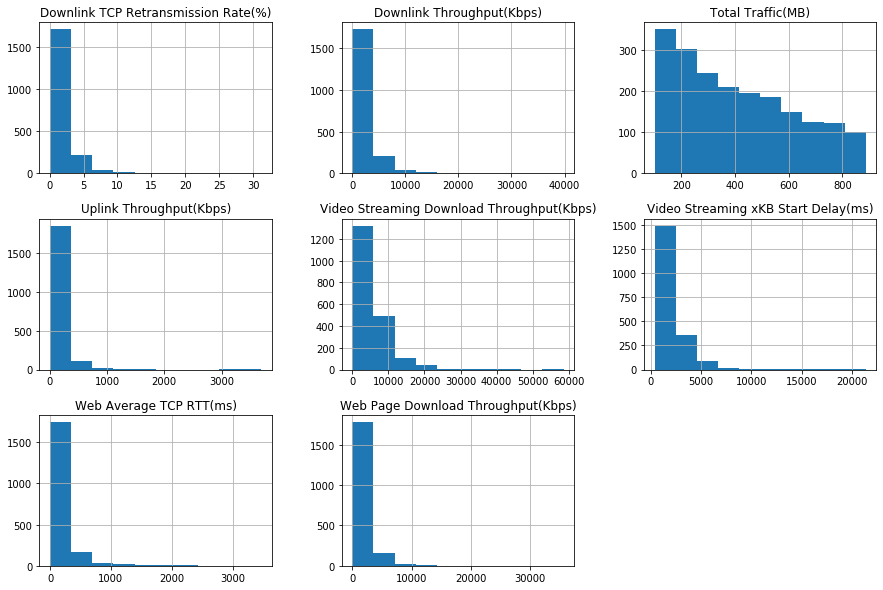

In [41]:
ax = df_unsatisfied[METRICS].hist(figsize = (15, 10))

Мы видим, что параметры имеют одинаковый скошенный характер распределения. Построим матрицу корреляции между показателями для всех пользователей, которые поставили оценку ниже 9.

Нормализуем значения показателей при помощи логарифма, чтобы сгладить разброс значений:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


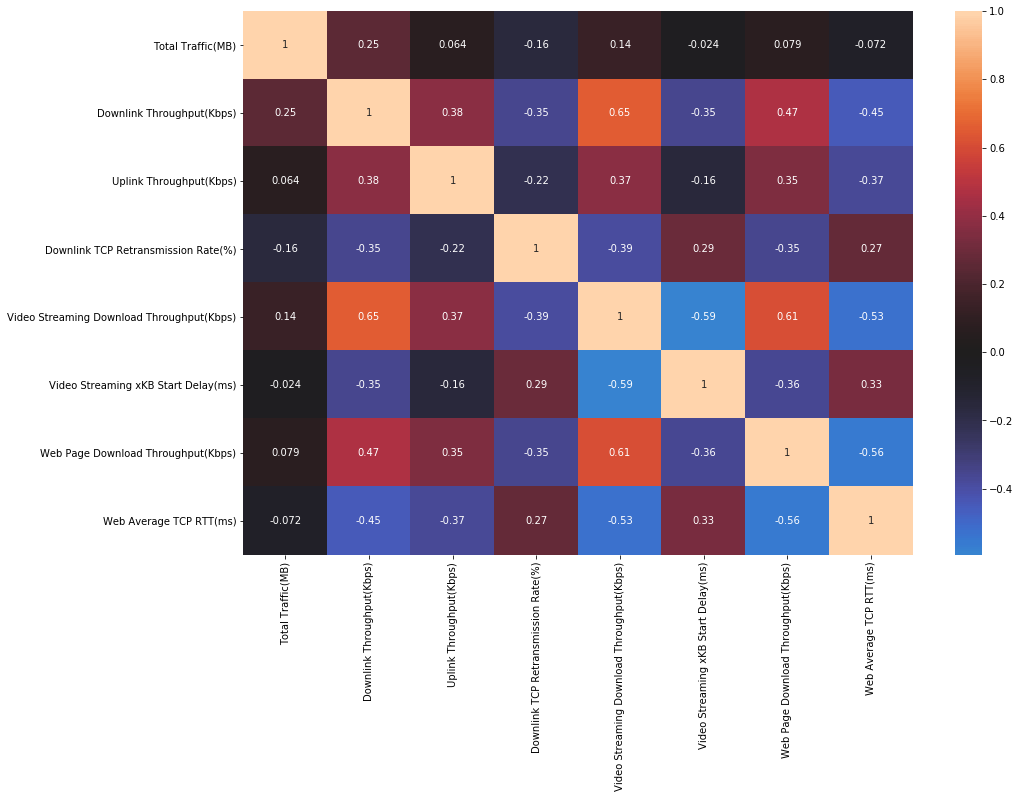

In [42]:
df_unsatisfied_log = df_unsatisfied[METRICS]

for col in df_unsatisfied_log.columns:
    df_unsatisfied_log[col] = df_unsatisfied_log[col].transform(np.log)
    
corr_m = df_unsatisfied_log.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_m, center=0, annot=True)

plt.show()

In [43]:
def correlation_characteristics (p_corr_m, p_only_string_corr = True):
    '''
    Получение значения качества связи между параметрами
    p_corr_m - матрица корреляции (pandas DataFrame)
    only_string_corr: 
      True - на выходе будут только параметры c заметной и сильной корреляцией: corr<= -0.5, corr>= -0.5
      False - на выходе будут все параметры
      
    return: pandas DataFrame: parametr1, parametr2, qual_charect (значение качества связи между параметрами)  
    '''
    
    add_rows= {}
    row_index= index= 0
    for row in p_corr_m.iterrows():
        j= row_index + 1
        while j< len(corr_m.columns):
        
            # пропускаем параметры со слабой связью
            if p_only_string_corr: 
                if -0.5< row[1][j] < 0.5:
                    j= j + 1
                    continue
                #if
        
            add_rows[index]={'param1':row[0]}       
            add_rows[index]['param2']= corr_m.columns[j]
            add_rows[index]['corr_value']= round(row[1][j], 4)
        
            qual_charect= ''
            if row[1][j] >= 0.9:
                qual_charect= 'Весьма высокая'
        
            elif 0.7 <= row[1][j] < 0.9:
                qual_charect= 'Высокая'
        
            elif 0.5 <= row[1][j] < 0.7:
                qual_charect= 'Заметная'
            
            elif 0.3 <= row[1][j] < 0.5:
                qual_charect= 'Умеренная'
            
            elif 0.1 <= row[1][j] < 0.3:
                qual_charect= 'Слабая'
            
            elif -0.1 < row[1][j] < 0.1:
                qual_charect= 'Отсутствует'
            
            elif -0.3 < row[1][j] <= -0.1:
                qual_charect= 'Слабая обратная'
            
            elif -0.5 < row[1][j] <= -0.3:
                qual_charect= 'Умеренная обратная'
            
            elif -0.7 < row[1][j] <= -0.5:
                qual_charect= 'Заметная обратная'
            
            elif -0.9 < row[1][j] <= -0.7:
                qual_charect= 'Высокая обратная'
            
            elif row[1][j] <= -0.9:
                qual_charect= 'Весьма высокая обратная'
            
        
            add_rows[index]['qual_charect']= qual_charect
        
            j= j + 1
            index= index + 1
        #while
          
        row_index = row_index + 1
    # for
    
    return pd.DataFrame.from_dict(add_rows, "index").sort_values('corr_value', ascending= False)
    
#correlation_characteristics

In [44]:
# выведем параметры, между которыми есть сильная связь 

correlation_characteristics (corr_m).sort_values('corr_value', ascending = False)

,param1,param2,corr_value,qual_charect
0,Downlink Throughput(Kbps),Video Streaming Download Throughput(Kbps),0.6537,Заметная
2,Video Streaming Download Throughput(Kbps),Web Page Download Throughput(Kbps),0.6126,Заметная
3,Video Streaming Download Throughput(Kbps),Web Average TCP RTT(ms),-0.5290,Заметная обратная
4,Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),-0.5596,Заметная обратная
1,Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),-0.5934,Заметная обратная


Теперь построим матрицу корреляции только для клиентов, которые жаловались на медленный интернет

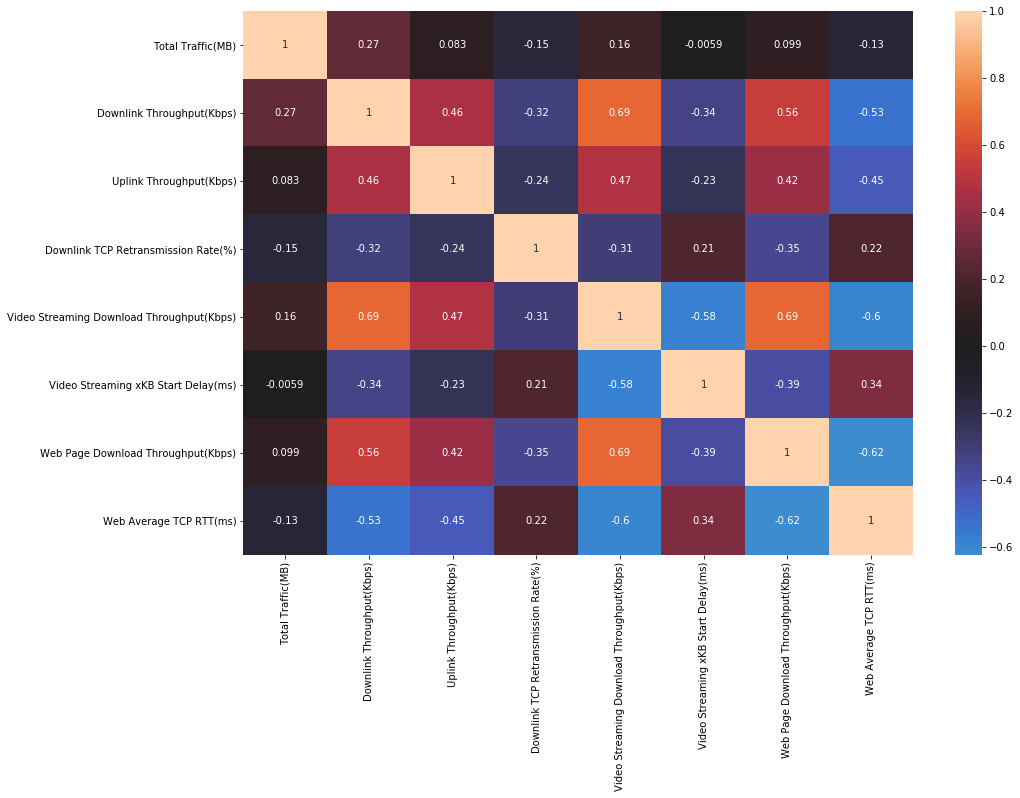

In [45]:
df_unsatisfied4_log = df_unsatisfied[df_unsatisfied["Q2"].str.contains("4")][METRICS]

for col in df_unsatisfied4_log.columns:
    df_unsatisfied4_log[col] = df_unsatisfied4_log[col].transform(np.log)
    
corr_m = df_unsatisfied4_log.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_m, center=0, annot=True)

plt.show()

In [46]:
correlation_characteristics (corr_m).sort_values('corr_value', ascending = False)

,param1,param2,corr_value,qual_charect
4,Video Streaming Download Throughput(Kbps),Web Page Download Throughput(Kbps),0.6928,Заметная
0,Downlink Throughput(Kbps),Video Streaming Download Throughput(Kbps),0.6917,Заметная
1,Downlink Throughput(Kbps),Web Page Download Throughput(Kbps),0.5562,Заметная
2,Downlink Throughput(Kbps),Web Average TCP RTT(ms),-0.5300,Заметная обратная
3,Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),-0.5806,Заметная обратная
5,Video Streaming Download Throughput(Kbps),Web Average TCP RTT(ms),-0.5953,Заметная обратная
6,Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),-0.6223,Заметная обратная


### 2.3 Выводы

По результатам анализа удалось подтвердить гипотезу о том, что между показателями "средняя скорость к абоненту", "скорость загрузки потокового видео", "задержка старта воспроизведения видео" и "скорость загрузки web-страниц через браузер" есть прямая связь, также удалось выявить обратную связь между "средней скоростью к абоненту" и "скоростью загрузки web-страниц через браузер" у клиентов, которые жалуются на низкую скорость интернета

Поэтому далее для анализа проблемы низкой скорости мобильного интернета будем использовать показатель **«средняя скорость к абоненту»**, т.к. он связан с большинством других показателей.

## 3. Между скоростью интернета и ответом клиентов есть корреляция

Попробуем определить есть ли связь между показателем средней скорости к абоненту и ответом клиентов, которые пожаловались на медленный мобильный интернет. Результат этого исследования поможет определить стоит ли заняться решением данной проблемы или этой проблемы не существует.<br>
Уточним, проверяемую нами гипотезу: **средняя скорость интернета к абоненту выше у клиентов, которые не жалуются на низкую скорость интернета, чем у клиентов, которые жалуются на низкую скорость интернета.**

### 3.1 Анализ данных

Выберем клиентов, которые пожаловались на низкую скорость мобильного интернета

In [47]:
df_unsatisfied_int = df_unsatisfied[df_unsatisfied["Q2"].str.contains("4")]

df_unsatisfied_int

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
6,7,2,"4, 5",448.88413,438.27,81.32,1.98,1699.64,4223,856.05,220
8,9,1,"1, 3, 4",783.64464,1786.99,271.77,0.84,6802.42,1200,1837.02,132
...,...,...,...,...,...,...,...,...,...,...,...
3100,3101,2,"1, 2, 4",248.99905,2347.42,309.08,1.64,5001.39,1394,1837.79,83
3101,3102,8,4,189.14150,2432.18,72.80,0.70,2152.91,2719,1410.52,289
3104,3105,1,"1, 3, 4",206.28181,105.24,65.84,3.86,349.04,2094,1035.69,267
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304


Выберем клиентов, которые не жаловались на интернет

In [48]:
df_unsatisfied_not_int = df_unsatisfied[df_unsatisfied["Q2"].str.contains("4") == False]

df_unsatisfied_not_int

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,-1,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
5,6,3,-1,416.67461,1346.89,175.53,1.08,4553.01,2136,1587.58,551
10,11,3,"1, 3",526.08652,535.54,208.67,1.46,2621.14,1479,2376.50,88
11,12,1,-1,730.53759,4020.94,569.49,1.57,8747.53,1556,1347.73,77
...,...,...,...,...,...,...,...,...,...,...,...
3094,3095,3,3,566.73519,3477.18,124.84,0.76,5427.74,1188,2410.91,145
3102,3103,8,1,413.99008,908.59,215.83,1.62,9449.73,1467,2212.11,51
3106,3107,1,-1,490.50187,1992.68,85.73,0.87,3477.94,2004,2369.41,245
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202


Посмотрим распределение средней скорости к абоненту на гистограмме

Text(0.5, 0, 'Кбит/сек')

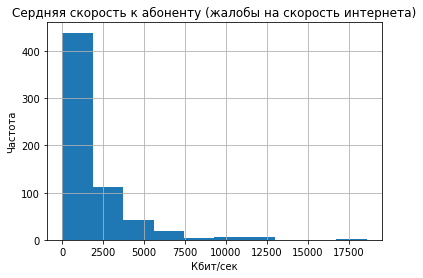

In [49]:
metric_name = 'Downlink Throughput(Kbps)'

ax = df_unsatisfied_int[metric_name].hist()

ax.set_title('Сердняя скорость к абоненту (жалобы на скорость интернета)')
ax.set_ylabel('Частота')
ax.set_xlabel('Кбит/сек')

Text(0.5, 0, 'Кбит/сек')

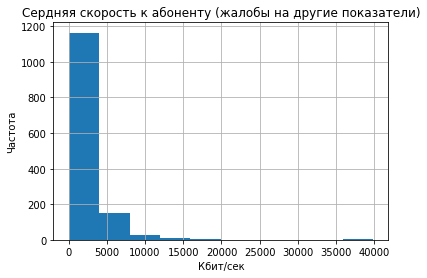

In [50]:
ax = df_unsatisfied_not_int[metric_name].hist()

ax.set_title('Сердняя скорость к абоненту (жалобы на другие показатели)')
ax.set_ylabel('Частота')
ax.set_xlabel('Кбит/сек')

Также посмотрим распределение скорости к абоненту у клиентов, которые ни на что не жаловались

Text(0.5, 0, 'Кбит/сек')

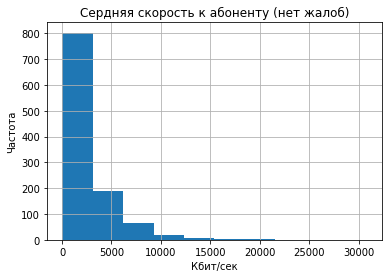

In [51]:
ax = df_satisfied[metric_name].hist()

ax.set_title('Сердняя скорость к абоненту (нет жалоб)')
ax.set_ylabel('Частота')
ax.set_xlabel('Кбит/сек')

Из гистограмм видно, что распределение скорости асимметрично, соответственно для сравнения значений скорости между разными группами клиентов необходимо посчитать дополнительные точечные оценки.

### 3.2 Статистический тест

Проверим гипотезы: 

$H_0$: Нет разницы в скорости к абоненту у клиентов, которые жалуются на низкую скорость мобильного интернета и клиентов, которые не жалуются низкую скорость мобильного интернета.<br>
$H_1$: Средняя скорость интернета к абоненту выше у клиентов, которые не жалуются на низкую скорость интернета, чем у клиентов, которые жалуются на низкую скорость интернета.<br>

Для сравнения значений средней скорости к абоненту посчитаем среднее, медиану, моду, дисперсию, а также посмотрим значения, которые выходят за 75% и 95%:

In [52]:
df_stat_download = pd.DataFrame()

df_stat_download['user complaint'] = ['internet', 'not internet', 'no complaints']
df_stat_download['mean'] = [df_unsatisfied_int[metric_name].mean(),
                            df_unsatisfied_not_int[metric_name].mean(),
                            df_satisfied[metric_name].mean()]

df_stat_download['median'] = [np.percentile(df_unsatisfied_int[metric_name], 50),
                              np.percentile(df_unsatisfied_not_int[metric_name], 50),
                              np.percentile(df_satisfied[metric_name], 50)]

df_stat_download['mode'] = [df_unsatisfied_int[metric_name].mode().transpose()[0],
                            df_unsatisfied_not_int[metric_name].mode().transpose()[0],
                            df_satisfied[metric_name].mode().transpose()[0]]


df_stat_download['disp'] = [df_unsatisfied_int[metric_name].std()**2,
                            df_unsatisfied_not_int[metric_name].std()**2,
                            df_satisfied[metric_name].std()**2]

df_stat_download['75'] = [np.percentile(df_unsatisfied_int[metric_name], 75),
                          np.percentile(df_unsatisfied_not_int[metric_name], 75),
                          np.percentile(df_satisfied[metric_name].std(), 75)]

df_stat_download['95'] = [np.percentile(df_unsatisfied_int[metric_name], 95),
                          np.percentile(df_unsatisfied_not_int[metric_name], 95),
                          np.percentile(df_satisfied[metric_name].std(), 95)]


df_stat_download

,user complaint,mean,median,mode,disp,75,95
0,internet,1768.408930,1110.715,14.23,4.229241e+06,2193.59250,5589.74000
1,not internet,2187.882703,1398.900,795.38,7.367190e+06,2771.27250,6795.04400
2,no complaints,2508.988813,1644.540,707.77,7.509335e+06,2740.31655,2740.31655


Из полученных оценок видно, что средне значение и медиана скорости к абоненту у клиентов, которые не жалуются на низкую скорость мобильного интернета действительно выше, чем у клиентов, которые жалуются низкую скорость. Особенно следует обратить внимание,что у большинства клиентов, которые пожаловались на интернет скорость в **50** раз ниже, чем у клиентов, которые не жалуются на интернет!

Дополнительно проверим наши гипотезы методом **Bootstrap**, который позволяет нам увеличить выборку методом многократно повторяющегося эксперимента, что хорошо подойдет в нашем случае, т. к. количество клиентов, которые пожаловались на скорость мобильного интернета составило **626** чел., что в 2 раза меньше (**1358**), чем количество клиентов, которые не жаловались на низкую скорость мобильного интернета.

In [53]:
def get_p_value_by_bootstrap (p_control, p_test, p_N= 1000):
    '''
    Рассчет p_value с ипользование метода bootstrap 
    
    p_control - выборка контрольных значений
    p_test -выборка тестовых значений
    p_N - количество итераций
    
    '''
    
    #рассчитаем разницу средних значений выборок
    mean_diff = p_test.mean() - p_control.mean()

    differences = np.zeros(p_N)

    i= 0
    while i < p_N:
    
        s1= np.random.choice(p_control, size= len(p_control), replace= True)
        s2= np.random.choice(p_test, size= len(p_test), replace= True)
    
        differences[i]= s2.mean() - s1.mean()
    
        i= i + 1
    #while

    # центрируем результат
    differences_cent= differences - differences.mean()

    return sum(differences_cent > mean_diff)/p_N
    
#get_p_value_by_bootstrap

In [54]:
#Посчитаем p_value для средней скорости к пользователю

p_value= get_p_value_by_bootstrap (df_unsatisfied_int[metric_name].to_numpy(),
                                   df_unsatisfied_not_int[metric_name].to_numpy())

p_value

0.0

### 3.3 Выводы

По результатам анализа удалось подтвердить гипотезу о корреляции между ответом клиентов и скоростью мобильного интернета, т.к. средняя скорость к абоненту у клиентов, которые жаловались на скорость мобильного интернета, ниже, чем у клиентов, которые не жаловались на этот показатель:

| **Тип клиента**               | **Среднее** | **Медиана** | **Мода** |
| ---------------------------------- | ----------- | ----------- | -------- |
| Жалуются на скорость интернета     | 1768.408930 | 1110.715    | 14.23    |
| Жалуются на другие показатели      | 2187.882703 | 1398.900    | 795.38   |
| Полностью довольны качеством связи | 2508.988813 | 1644.540    | 707.77   |


Дополнительная проверка методом **Bootstrap** подтверждает, что мы не можем принять (отвергаем) гипотезу о равенстве средней скорости у клиентов, которые жалуются на низкую скорость мобильного интернета и которые не жалуются на скорость мобильного интернета, на имеющихся данных т. к. **p_value = 0.001**, что меньше чем уровень значимости в 0.05.

## 4. Между скоростью мобильного интернета и переотправкой пакетов есть корреляция

На предыдущем этапе исследования удалось подтвердить связь между жалобами клиентов на низкую скорость мобильного интернета и собранными техническими показателями. Теперь надо попробовать найти причину проблем со скоростью мобильного интернета, чтобы снизить время работы инженеров, которые будут работать над решением проблемы. 
В исходных данных присутствует показатель «частота переотправки пакетов», который может свидетельствовать о проблемах в работе сети.<br>
Уточним, проверяемую гипотезу: **частота переотправки пакетов к абоненту выше у клиентов, которые жалуются на низкую скорость интернета, чем у клиентов, которые не жалуются на низкую скорость интернета.**

### 4.1 Анализ данных

Посмотрим распределение частоты переотправок пакетов к абоненту у клиентов, которые жаловались на скорость мобильного интернета

Text(0.5, 0, 'Количество')

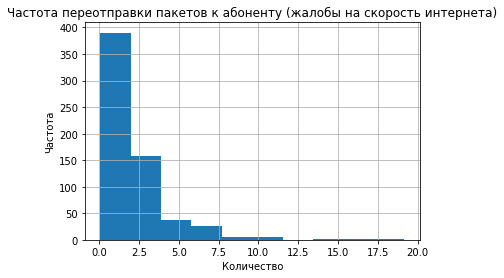

In [55]:
metric_name = 'Downlink TCP Retransmission Rate(%)'

ax = df_unsatisfied_int[metric_name].hist()

ax.set_title('Частота переотправки пакетов к абоненту (жалобы на скорость интернета)')
ax.set_ylabel('Частота')
ax.set_xlabel('Количество')

Теперь посмотрим распределение частоты переотправок пакетов к абоненту у клиентов, которые не жаловались на скорость мобильного интернета

Text(0.5, 0, 'Количество')

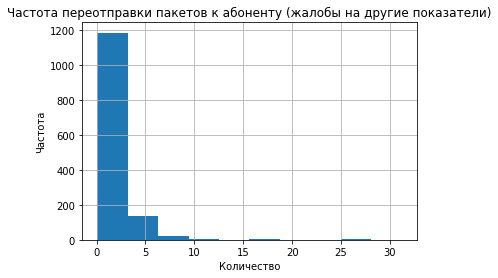

In [56]:
ax = df_unsatisfied_not_int[metric_name].hist()

ax.set_title('Частота переотправки пакетов к абоненту (жалобы на другие показатели)')
ax.set_ylabel('Частота')
ax.set_xlabel('Количество')

Text(0.5, 0, 'Количество')

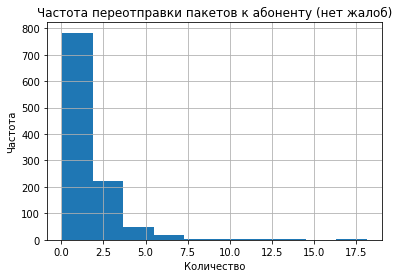

In [57]:
ax = df_satisfied[metric_name].hist()

ax.set_title('Частота переотправки пакетов к абоненту (нет жалоб)')
ax.set_ylabel('Частота')
ax.set_xlabel('Количество')

Из гистограмм видно, что распределение количества переотправок пакетов асимметрично, соответственно для сравнения значений у разных групп клиентов необходимо посчитать дополнительные точечные оценки.

### 4.2 Статистический тест

Проверим гипотезы: 

$H_0$: Нет разницы в частоте переотправки пакетов у клиентов, которые жалуются на низкую скорость мобильного интернета и клиентов, которые не жалуются низкую скорость мобильного интернета.<br>
$H_1$: Частота переотправки пактов к абоненту выше у клиентов, которые жалуются на низкую скорость интернета, чем у клиентов, которые не жалуются на низкую скорость интернета.<br>

Для сравнения значений средней скорости к абоненту посчитаем среднее, медиану, моду, дисперсию, а также посмотрим значения, которые выходят за 75% и 95%:

In [58]:
df_stat_retransmission = pd.DataFrame()

df_stat_retransmission = pd.DataFrame()

df_stat_retransmission['user complaint'] = ['internet', 'not internet', 'no complaints']
df_stat_retransmission['mean'] = [df_unsatisfied_int[metric_name].mean(),
                                  df_unsatisfied_not_int[metric_name].mean(),
                                  df_satisfied[metric_name].mean()]

df_stat_retransmission['median'] = [np.percentile(df_unsatisfied_int[metric_name], 50),
                                    np.percentile(df_unsatisfied_not_int[metric_name], 50),
                                    np.percentile(df_satisfied[metric_name], 50)]

df_stat_retransmission['mode'] = [df_unsatisfied_int[metric_name].mode().transpose()[0],
                                  df_unsatisfied_not_int[metric_name].mode().transpose()[0],
                                  df_satisfied[metric_name].mode().transpose()[0]]

df_stat_retransmission['disp'] = [df_unsatisfied_int[metric_name].std()**2,
                                  df_unsatisfied_not_int[metric_name].std()**2,
                                  df_satisfied[metric_name].std()**2]

df_stat_retransmission['75'] = [np.percentile(df_unsatisfied_int[metric_name], 75),
                                np.percentile(df_unsatisfied_not_int[metric_name], 75),
                                np.percentile(df_satisfied[metric_name].std(), 75)]

df_stat_retransmission['95'] = [np.percentile(df_unsatisfied_int[metric_name], 95),
                                np.percentile(df_unsatisfied_not_int[metric_name], 95),
                                np.percentile(df_satisfied[metric_name].std(), 95)]


df_stat_retransmission

,user complaint,mean,median,mode,disp,75,95
0,internet,2.126278,1.520,0.70,4.510569,2.550000,6.375000
1,not internet,1.844816,1.305,0.48,4.851659,2.260000,4.836000
2,no complaints,1.650175,1.190,0.41,3.298277,1.816116,1.816116


Из полученных оценок видно, что средне значение, медиана и мода количества переотравок пакетов у клиентов, которые жалуются на скорость интернета выше, чем у клиентов, которые не жалуются на скорость мобильного интернета.

Аналогично п. 3 дополнительно проверим наши гипотезы методом Bootstrap:

In [59]:
p_value= get_p_value_by_bootstrap (df_unsatisfied_not_int[metric_name].to_numpy(), 
                                   df_unsatisfied_int[metric_name].to_numpy())

p_value

0.003

### 4.3 Выводы

По результатам анализа удалось подтвердить гипотезу о корреляции между скоростью мобильного интернета и частотой переотправки пакетов к абоненту, т.к. у клиентов, которые жаловались на скорость мобильного интернета частота переотправки пакетов, выше, чем у клиентов, которые не жаловались на этот показатель. Этот факт подтвердился статистическими оценками и результатами проверки методом Bootstrap, следовательно мы не можем принять гипотезу о равенстве переотправок пакетов к абоненту у клиентов, которые жалуются на низкую скорость мобильного интернета и которые не жалуются на скорость мобильного интернета, на имеющихся данных т. к. **p_value = 0.003**, что меньше чем уровень значимости в 0.05.

## Заключение

В результате проведенного исследования опроса клиентов компании удовлетворенностью качеством связи, удалось установить:

* Большинство (65%), опрошенных) клиентов недовольны качеством связи.
* Больше всего клиенты недовольны:
 * недозвонами и обрывами при звонках
 * плохим качеством связи в зданиях
 * медленным мобильным интернетом

* между показателями "средняя скорость к абоненту", "скорость загрузки потокового видео", "задержка старта воспроизведения видео" и "скорость загрузки web-страниц через браузер" есть прямая связь.

* У клиентов, которые жаловались на низкую скорость мобильного интернета, показатель скорости к абоненту заметно ниже, чем у клиентов, которые не жаловались на низкую скорость мобильного интернета - мода значения скорости к абоненту составляет всего **14 Кбит/сек против 795 Кбит/сек**.
* У клиентов, которые жаловались на низкую скорость мобильного интернета выше количество повторно отправляемых пакетов.

Все выдвинутые локальные гипотезы подтвердились, что также подтверждает главную гипотезу исследования о том, что жалобы клиентов на мобильный интернет подтверждаются, собранными техническими показателями.

**Исходя из вышеизложенного, рекомендуется:**
* Выполнить работы по выявлению причин:
 * недозвонов и обрывов при звонках
 * плохого качества связи в зданиях
 * медленного мобильного интернета


* При выполнении работ по устранению проблем с низкой скоростью интернета у клиентов, обратить внимание на повышенную повторную отправку пакетов.
* Использовать данные геолокации клиентов, что позволит определить зоны, плохого качества связи.
* Обратить внимание на модели устройств, которые используют клиенты, возможно часть проблем заложена в них, т. к. не все устройства позволяют удерживать стабильный сигнал и обладают поддержкой стандартов скоростной передачи данных.